In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import random
from tqdm import tqdm
plt.style.use('ggplot')

In [5]:
population = stats.norm.rvs(loc=5, scale=2, size=100000)

In [6]:
sample_size = 100
sample = np.random.choice(a=population, size=sample_size)

In [7]:
sample_mean = sample.mean()
st_dev = population.std()

In [9]:
z_value = stats.norm.ppf(q=0.975)
print('z_value:', z_value)

z_value: 1.959963984540054


In [11]:
stats.norm.ppf(q=0.025)

-1.9599639845400545

In [13]:
interval = z_value * (st_dev/np.sqrt(sample_size))
conf_inv = (sample_mean - interval, sample_mean + interval)

print('Confidence interval:', conf_inv)

Confidence interval: (4.316310990087028, 5.099845560779317)


In [15]:
def compute_ci(sample, st_dev):
    
    z_value = stats.norm.ppf(q=0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample.mean() - interval, sample.mean() + interval)
    return conf_inv

In [17]:
np.random.seed(5)
sample_size = 2000
sample = np.random.choice(a=population, size=sample_size)

ci = compute_ci(sample, st_dev)
print('Conf interval for 2000 sample size:', ci)

Conf interval for 2000 sample size: (4.925070650199397, 5.100274306478304)


In [19]:
def comput_ci_t(sample, alpha=0.95):
    n = sample.shape[0]
    mu, se = np.mean(sample), stats.sem(sample)
    bound = se * stats.t.ppf((1 + alpha)/2, n-1)
    return mu - bound, mu + bound

In [20]:
sample = np.random.choice(a=population, size=30)
ci_t = comput_ci_t(sample)
print('conf interval for t test for 2000 sample size:', ci_t)

conf interval for t test for 2000 sample size: (4.01644881237591, 5.189925477563274)


In [24]:
taxi_mex = pd.read_csv('taxi-routes/mex_clean.csv')

In [21]:
def generate_distribution_sample(data, sample_size, dist_size):
    sample_means = []
    for i in tqdm(range(dist_size)):
        sample = np.random.choice(a=data, size=sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

In [22]:
sample_size = 10000
dist_size = 50000

In [25]:
sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000,
                                            sample_size,
                                            dist_size)

100%|██████████| 50000/50000 [00:10<00:00, 4748.13it/s]


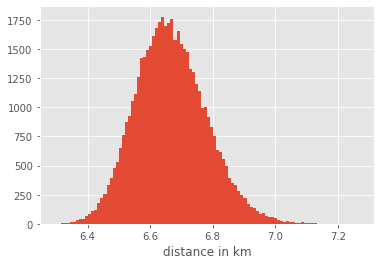

In [26]:
plt.hist(sample_means, bins=100)
plt.xlabel('distance in km');

In [27]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print('conf interval for bootstrap:', (lb, ub))

conf interval for bootstrap: (6.461480465, 6.903554787500001)
